## Задача 1.1

Проверить мощность и консервативность критериев Лиллиефорса, Харке-Бера, Шапиро-Улика для выборок из следующих распределений:
* Нормальное
* Лапласа
* Стьюдента
* Усеченное нормальное распределение (модуль каждого элемента выборки не превосходит 2)

In [27]:
from scipy.stats import jarque_bera, laplace, norm, t, truncnorm, shapiro
from statsmodels.stats.diagnostic import lilliefors
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [57]:
alpha = 0.05
nums_samples = list(range(100, 3000, 100))
reps=1000
krits = [lilliefors, jarque_bera, shapiro]
krits_names = ["lilliefors", "jarque_bera", "shapiro"]
samples_names = ['laplace', 't', 'truncnorm']

In [58]:
cons = {name: [] for name in krits_names}
power = {samp_name: {krit_name: [] for krit_name in krits_names} for samp_name in samples_names}

for n in nums_samples:
    norm_sample = [norm.rvs(size=n) for i in range(reps)]
    laplace_sample = [laplace.rvs(size=n) for i in range(reps)]
    t_sample = [t.rvs(df=3, size=n) for i in range(reps)]
    truncnorm_sample = [truncnorm.rvs(-2, 2, size=n) for i in range(reps)]

    samples_set = [laplace_sample, t_sample, truncnorm_sample]

    for krit, krit_name in zip(krits, krits_names):
        cons[krit_name].append(sum([krit(norm_sample[i])[1] < alpha for i in range(reps)]) / reps)
        for samp_name, samp_set in zip(samples_names, samples_set):
            power[samp_name][krit_name].append(sum([krit(samp_set[i])[1] < alpha for i in range(reps)]) / reps)

Рассотрим консервативность критериев: 

Критерий консервативен — истинная вероятность ошибки первого рода
ограничена уровнем значимости сверху.

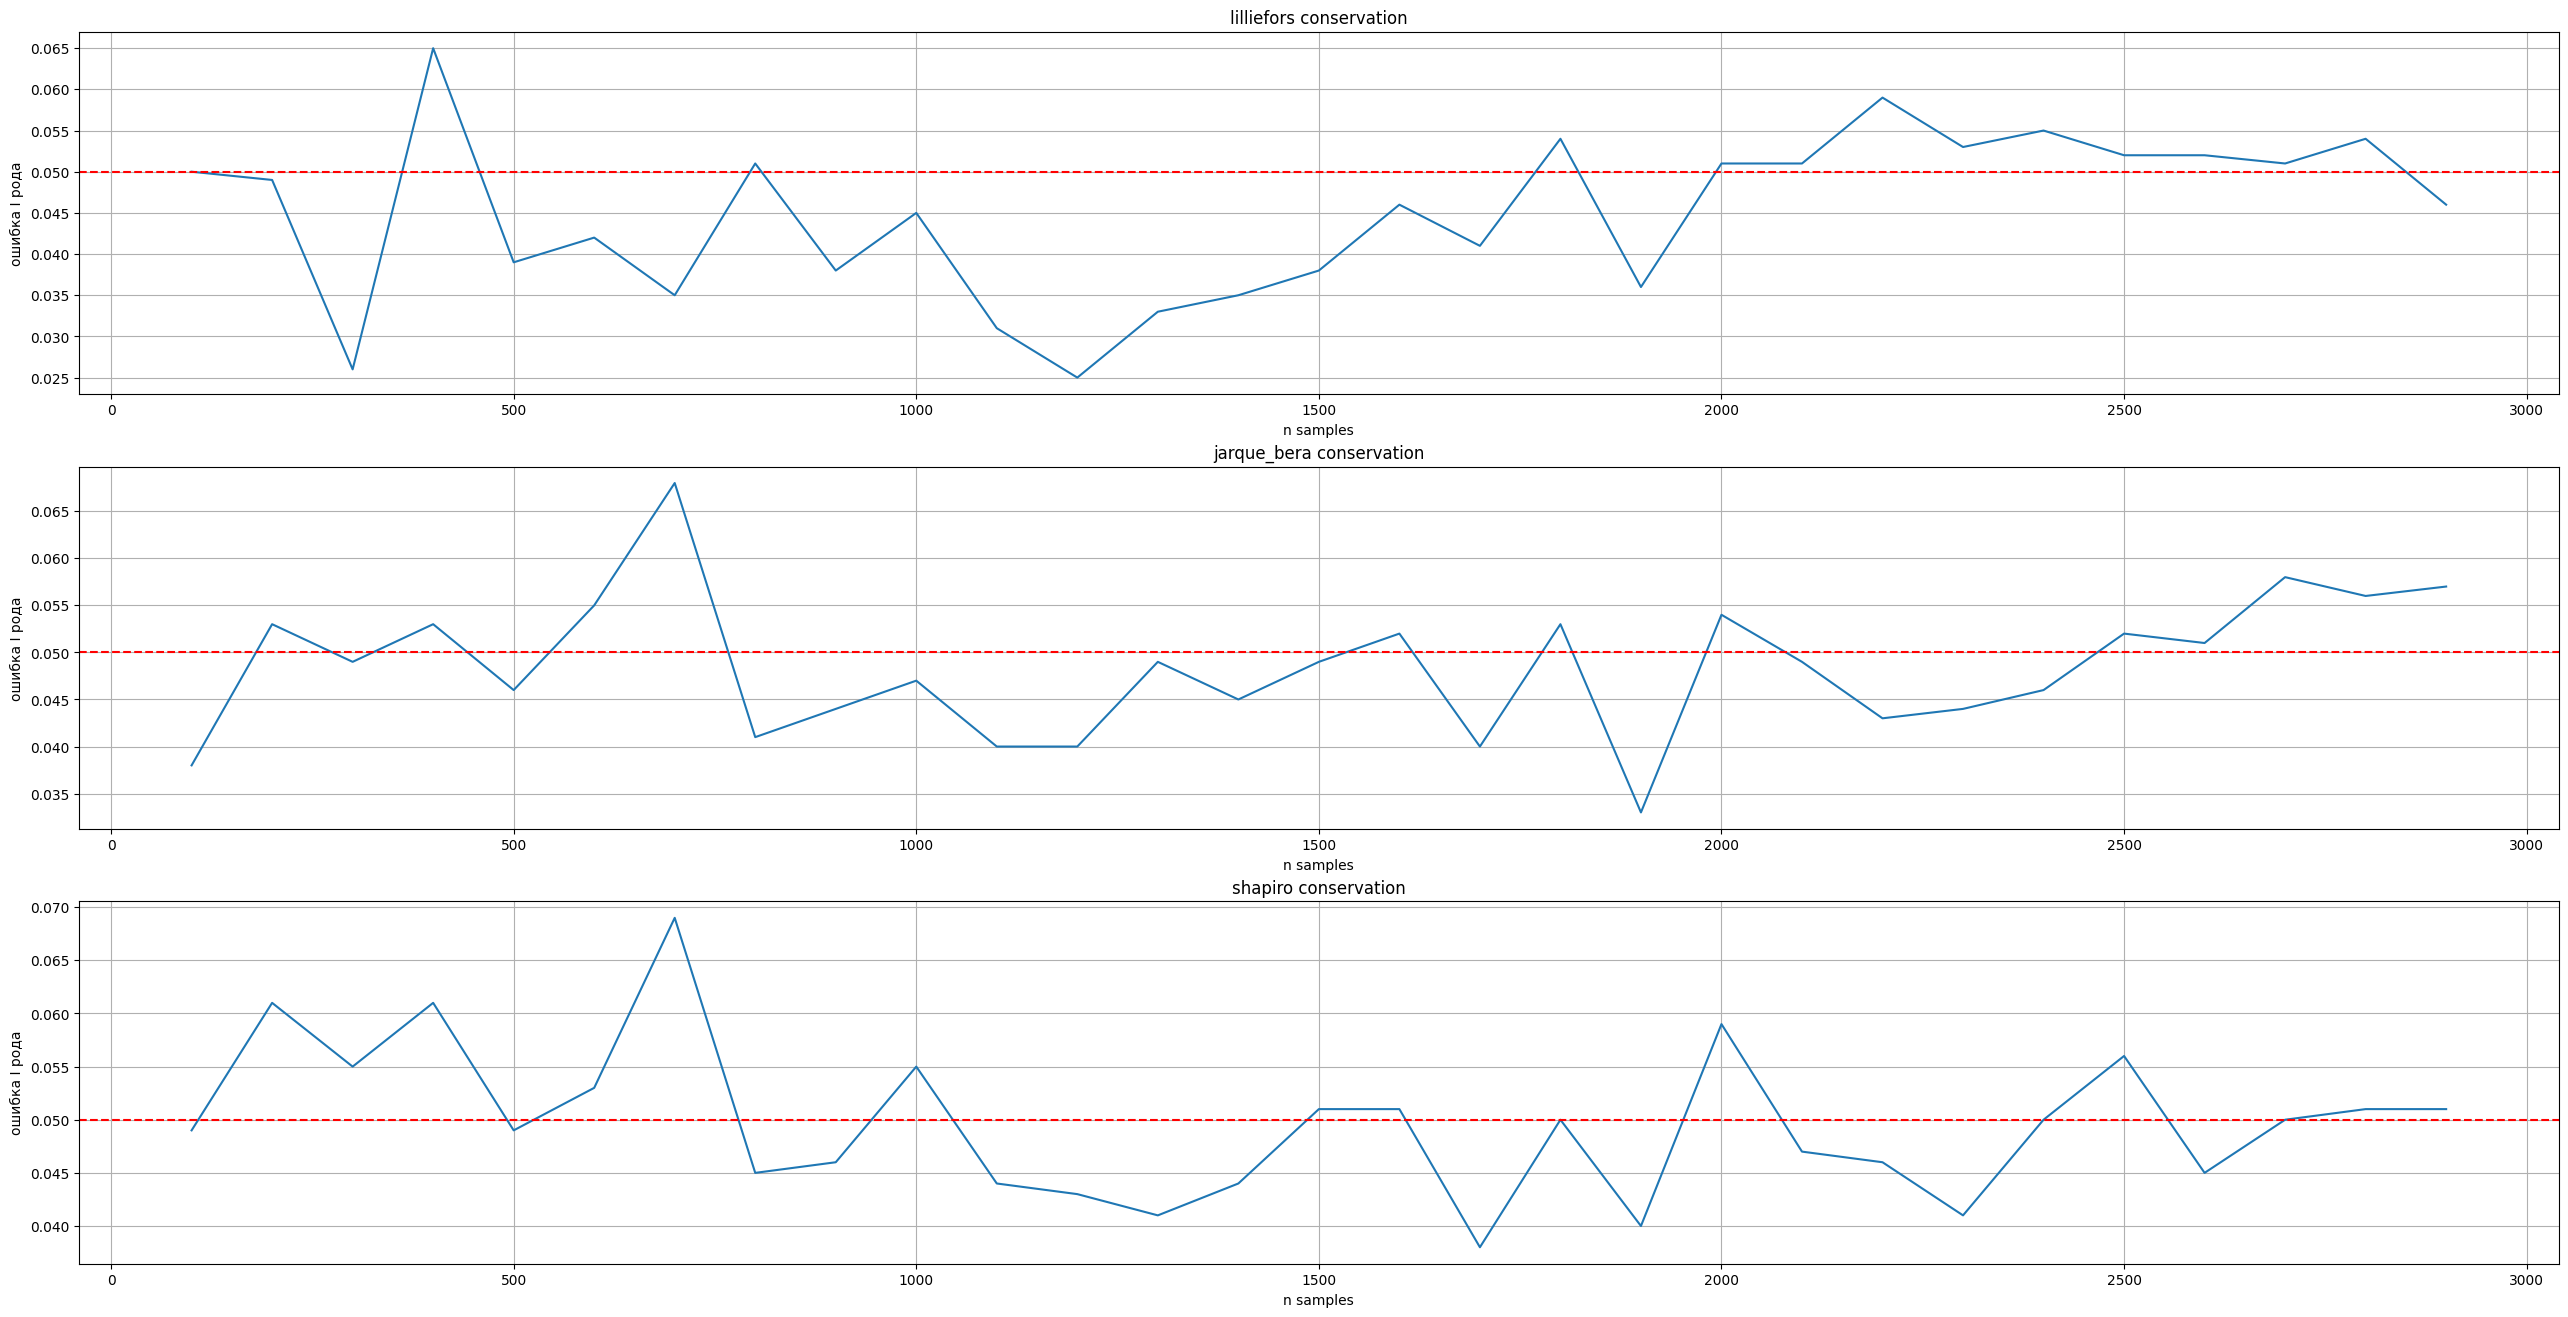

In [59]:
fig, ax = plt.subplots(3, figsize=(32, 16))

for i, krit_name in enumerate(krits_names):
    ax[i].plot(nums_samples, cons[krit_name])
    ax[i].axhline(y=alpha, color='red', linestyle='--')
    ax[i].set_xlabel('n samples')
    ax[i].set_ylabel('ошибка I рода')
    ax[i].set_title(krit_name + ' conservation')
    ax[i].grid()

Видим, что все критерии не консервативны

Далее посмотрим на мощность

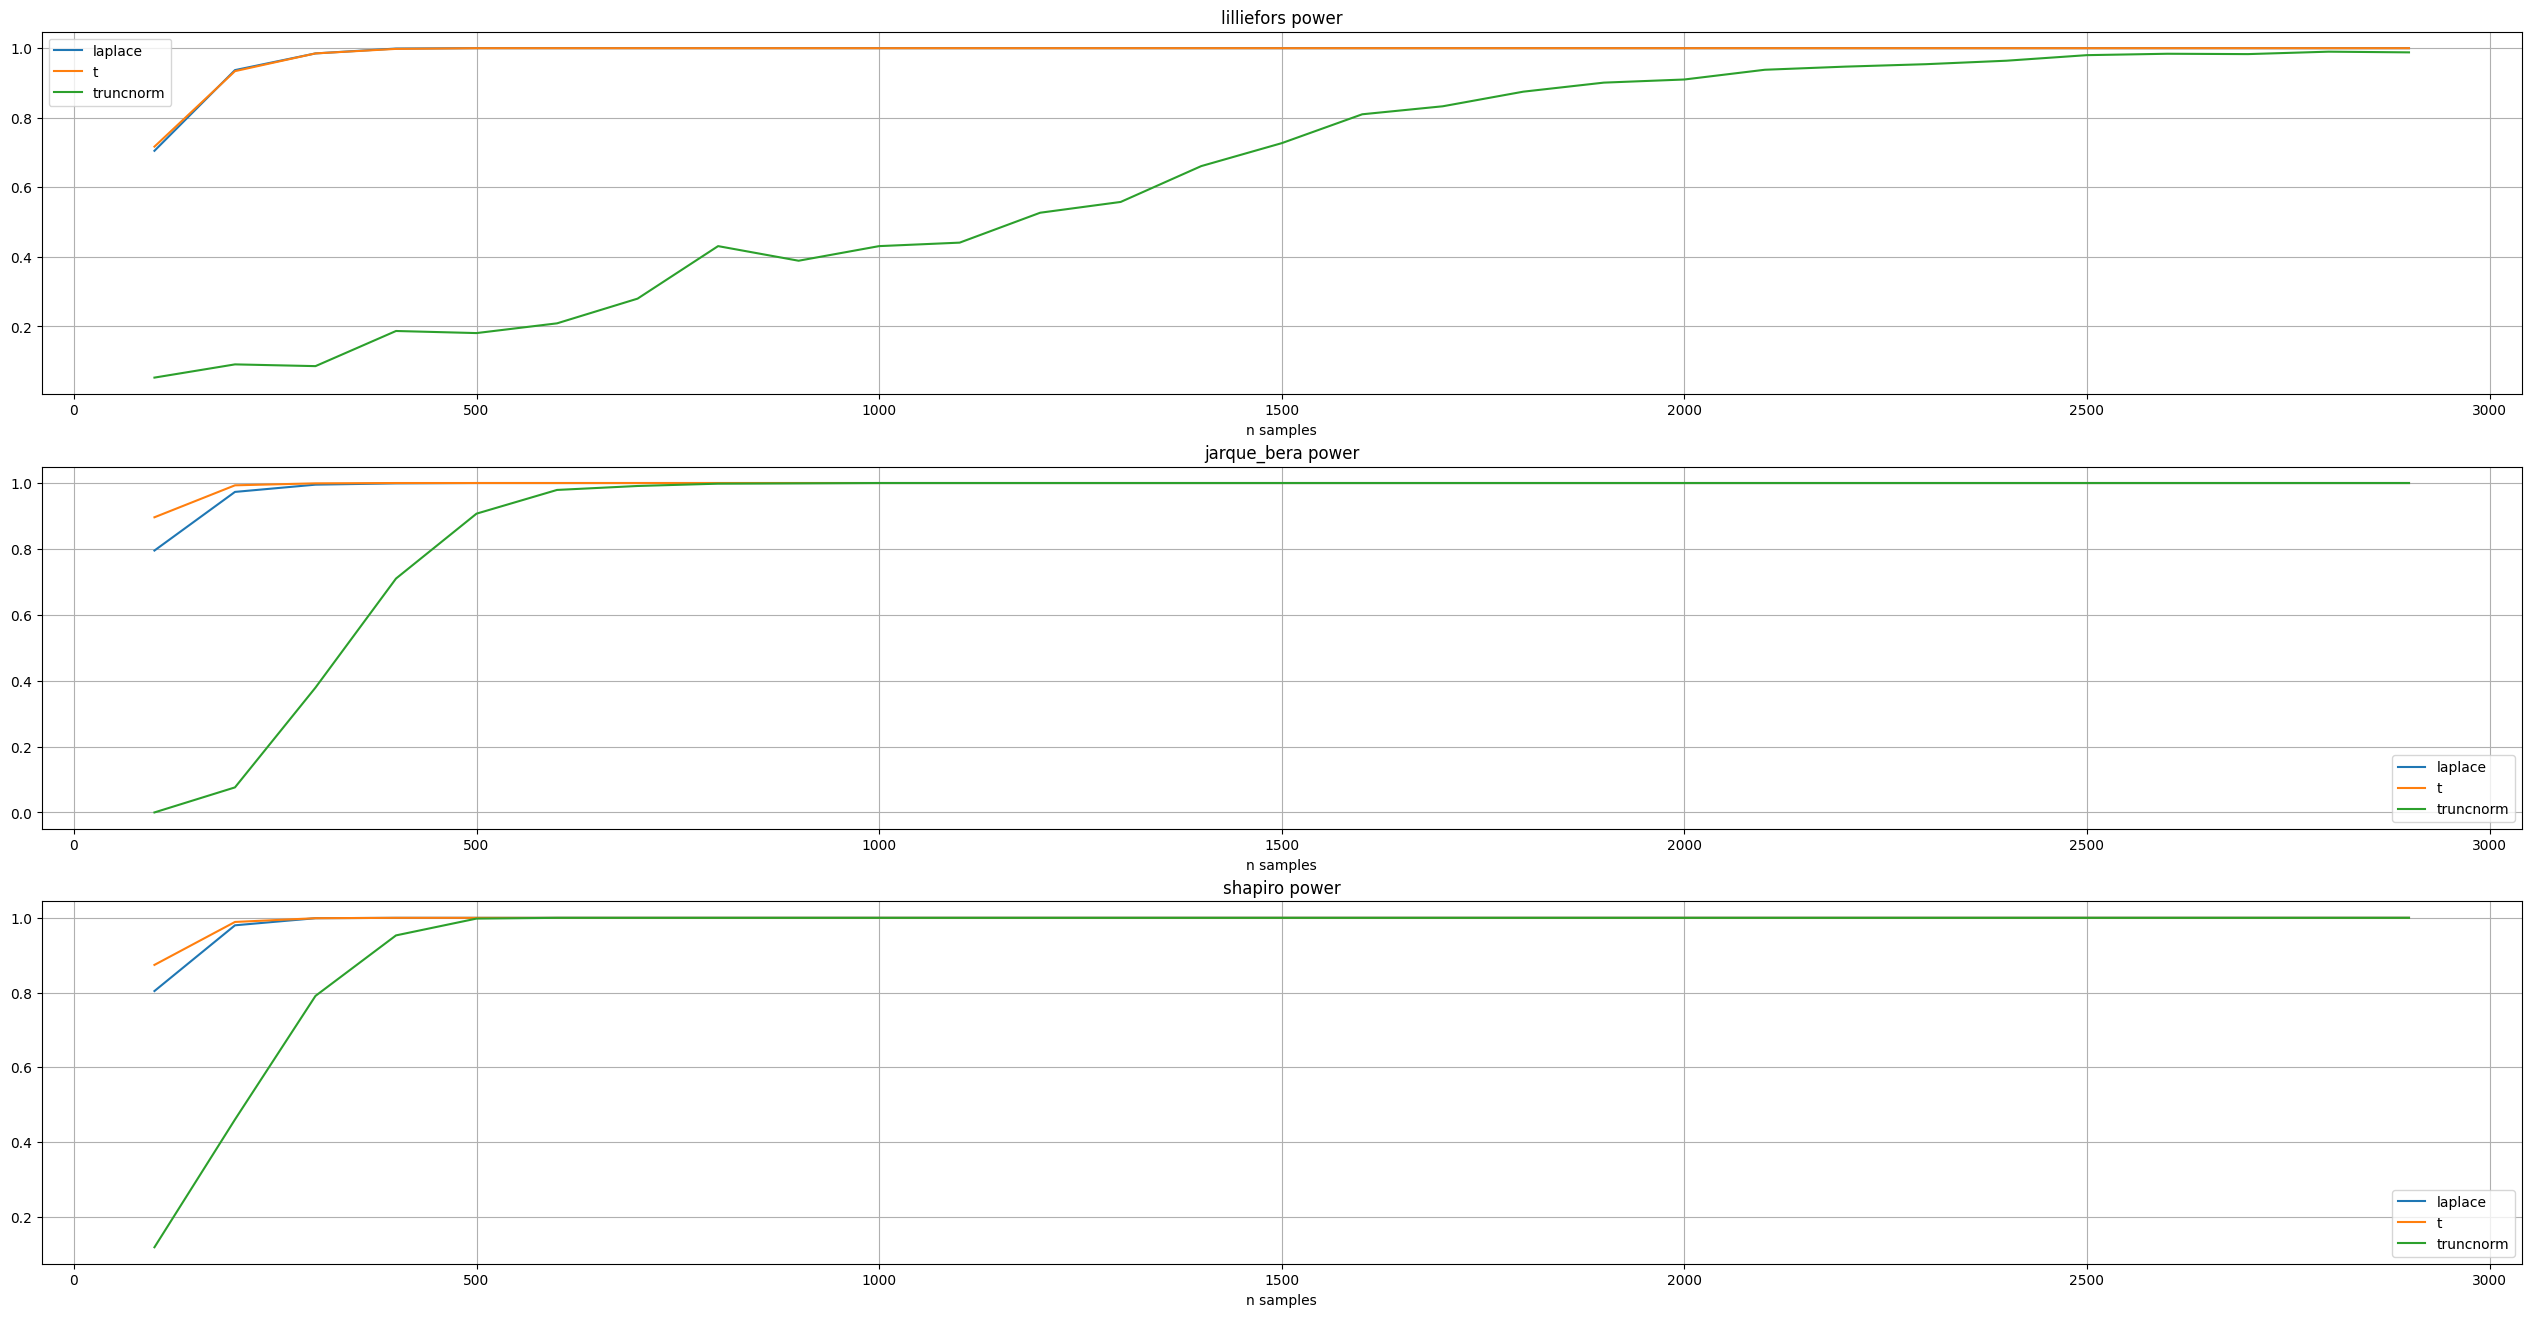

In [60]:
fig, ax = plt.subplots(3, figsize=(32, 16))

for i, krit_name in enumerate(krits_names):
    for sample_name in samples_names:
        ax[i].plot(nums_samples, power[sample_name][krit_name], label=f'{sample_name}')
        ax[i].set_title(krit_name + ' power')
        ax[i].set_xlabel('n samples')
        ax[i].grid()
        ax[i].legend()

Видим как мощность растет с увеличением выборки, причем медленнее всего на усеченном нормальном. В остальных случаях примерно в одно время мощность достигает максимума